In [3]:
import pandas as pd
import seaborn as sns 

# 1. Titanic verisini doğrudan kütüphaneden yüklüyoruz.
df = sns.load_dataset('titanic')

# 2. Veriye ilk bakış
print(df.head())

# 3. Boş veri var mı?
print("-" * 30)
print(df.info())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  ----- 

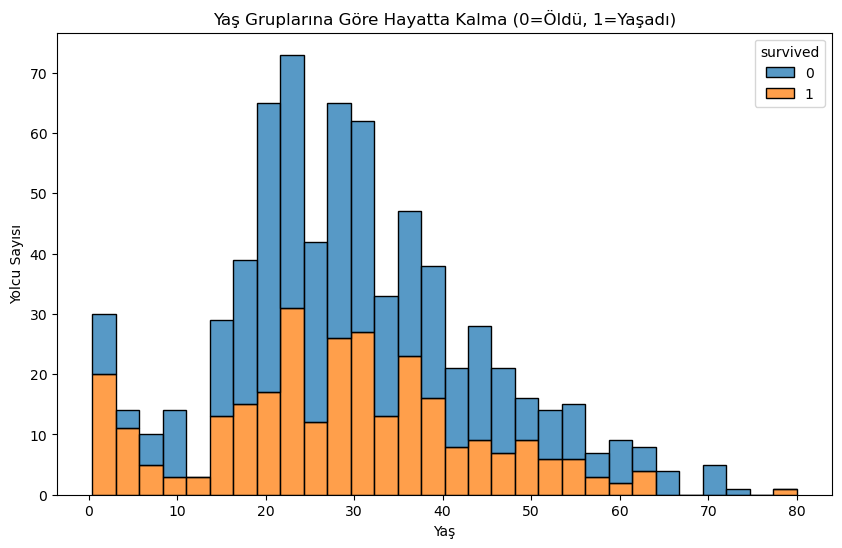

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Önce boş bir tuval açalım
plt.figure(figsize=(10, 6))

# Histogram çizelim:
# x='age' -> Yatay eksende yaşlar olsun
# hue='survived' -> Renkleri "Yaşadı/Öldü" diye ayır
# multiple='stack' -> Üst üste yığ ki oranları görelim
sns.histplot(data=df, x='age', hue='survived', multiple='stack', bins=30)

plt.title("Yaş Gruplarına Göre Hayatta Kalma (0=Öldü, 1=Yaşadı)")
plt.xlabel("Yaş")
plt.ylabel("Yolcu Sayısı")
plt.show()

In [5]:
# Hangi sütunda kaç tane eksik veri var?
print(df.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [6]:
# 1. 'deck' sütununu komple siliyoruz (Çok fazla boş var)
df = df.drop(columns=['deck']) 

# 2. Gemidekilerin yaş ortalamasını bulalım
ortalama_yas = df['age'].mean()

# 3. Boş olan yaşları bu ortalamayla dolduralım
df['age'] = df['age'].fillna(ortalama_yas)

# 4. Kontrol: Her yer 0 olmalı (Tertemiz!)
print(df.isnull().sum())

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64


In [8]:
import seaborn as sns
import pandas as pd

# 1. Veriyi Temizle
df = sns.load_dataset('titanic')
df.drop(columns=['deck'], inplace=True)
df['age'] = df['age'].fillna(df['age'].mean())
df.dropna(inplace=True)

# 2. Gereksizleri At
gereksizler = ['embark_town', 'alive', 'who', 'adult_male', 'class']
df = df.drop(columns=gereksizler, axis=1)


df = pd.get_dummies(df, columns=['sex', 'embarked'], drop_first=True, dtype=int)

# Sonucu görelim
print("✅ Artık hepsi 1 ve 0 oldu:")
print(df.head())

✅ Artık hepsi 1 ve 0 oldu:
   survived  pclass   age  sibsp  parch     fare  alone  sex_male  embarked_Q  \
0         0       3  22.0      1      0   7.2500  False         1           0   
1         1       1  38.0      1      0  71.2833  False         0           0   
2         1       3  26.0      0      0   7.9250   True         0           0   
3         1       1  35.0      1      0  53.1000  False         0           0   
4         0       3  35.0      0      0   8.0500   True         1           0   

   embarked_S  
0           1  
1           0  
2           1  
3           1  
4           1  


In [9]:
from sklearn.model_selection import train_test_split

# 1. X ve y'yi ayıralım
# y -> Hedefimiz (Survive sütunu)
y = df['survived'] 

# X -> Geri kalan her şey
X = df.drop(columns=['survived'])

# 2. Veriyi Bölelim (%20 Test, %80 Eğitim)
# random_state=42 -> Her çalıştırdığında aynı şekilde bölsün ki sonuçlarımız değişmesin (Mühendislik standardıdır)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bakalım elimizde ne kadar veri kalmış?
print(f"Toplam Yolcu: {len(df)}")
print(f"Ders Çalışılacak (Train): {len(X_train)}")
print(f"Sınav Yapılacak (Test): {len(X_test)}")

Toplam Yolcu: 889
Ders Çalışılacak (Train): 711
Sınav Yapılacak (Test): 178


In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 1. Modeli Oluştur
model = DecisionTreeClassifier(random_state=42)

# 2. Eğit 
# X_train (Sorular) ve y_train (Cevaplar) ile kuralları öğreniyor
model.fit(X_train, y_train)

# 3. Tahmin Et 
# X_test (Görmediği sorular) veriyoruz, bakalım ne diyecek?
tahminler = model.predict(X_test)

# 4. Karne Notu
basari_orani = accuracy_score(y_test, tahminler)

print(f"🎉 Modelin Başarı Oranı: %{basari_orani * 100:.2f}")

🎉 Modelin Başarı Oranı: %76.40


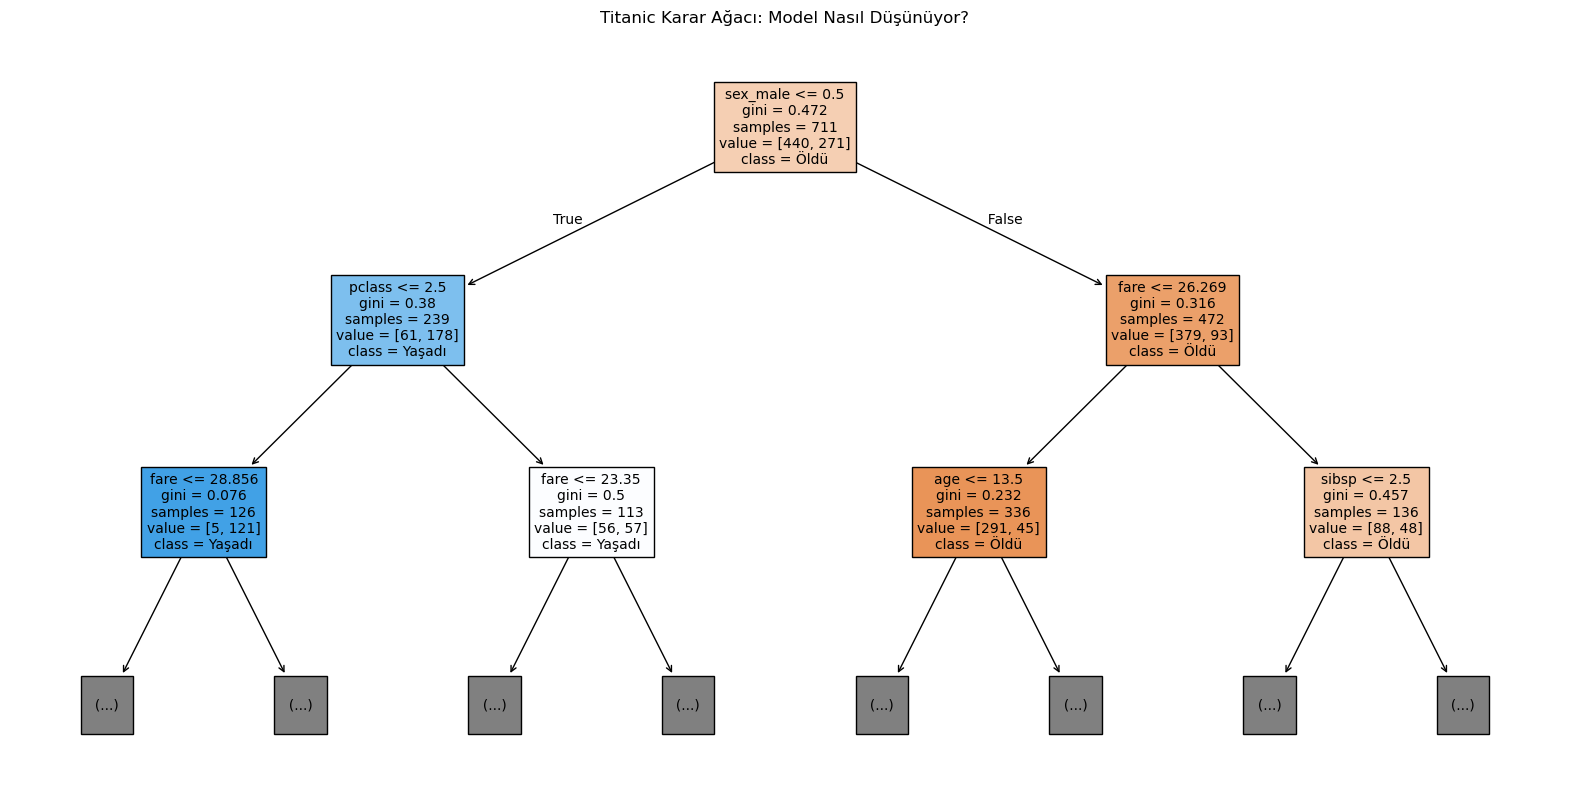

In [12]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10)) 

plot_tree(model, 
          filled=True,  #(Mavi: Yaşayanlar, Turuncu: Ölenler)
          feature_names=X.columns, 
          class_names=["Öldü", "Yaşadı"], 
          max_depth=2, # Sadece ilk 2 seviyeyi göster
          fontsize=10)

plt.title("Titanic Karar Ağacı: Model Nasıl Düşünüyor?")
plt.show()

In [14]:
import pandas as pd

# Modeli test etme .
yeni_yolcu = pd.DataFrame({
    'pclass': [1],      # 1. Sınıf
    'age': [21],        # 21 Yaşında
    'sibsp': [0],       # Kardeş/Eş yok
    'parch': [0],       # Aile yok
    'fare': [100],      # Bilet parası
    'alone': [True],    # <--- İŞTE BU EKSİKTİ! (True = Evet, yalnız)
    'sex_male': [0],    # Kadın (0)
    'embarked_Q': [0],  # Queenstown değil
    'embarked_S': [1]   # Southampton
})

# Şimdi tekrar tahmin et bakalım...
sonuc = model.predict(yeni_yolcu)

print("-" * 30)
if sonuc[0] == 1:
    print("🎉 TEBRİKLER! Yapay Zeka senin HAYATTA KALACAĞINI tahmin etti! 🚢🌊")
else:
    print("💀 Maalesef... Model kurtulamayacağını düşünüyor. 🎻")

------------------------------
🎉 TEBRİKLER! Yapay Zeka senin HAYATTA KALACAĞINI tahmin etti! 🚢🌊
